# E-Commerce Shipping - Classification

## Contents:

- Data Description & Cleaning
- Exploratory Data Analysis (EDA)
        o Categorical Features
        o Numerical Features
        o Target Column
- Outliers
        o Log Transformation
        o Square Root Transformation
        o Winsorization
- Heatmap
- One-Hot-Encoding
- Scaling
        o Normalization
        o Standardization
- Building Machine Learning Models
        o Logistic Regression
        o KNN
        o Decision Trees
        o Random Forest
        o AdaBoost
        o Gradient Boosting
        o Extra Trees
        o CatBoost
        o Support Vector Machines
        o XGBoost
        o LightGBM
- Hyperparameter Tuning
        o Logistic Regression
        o KNN
        o Decision Trees
        o Random Forest
        o AdaBoost
        o Gradient Boosting
        o Extra Trees
        o CatBoost
        o Support Vector Machines
        o XGBoost
        o LightGBM
- Best Parameters & Comparison
- Classification with Artificial Neural Networks (ANNs)

## Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Columns
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- **ID**: ID Number of Customers.
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product**: Cost of the Product in US Dollars.
- **Prior purchases**: The Number of Prior Purchase.
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
- **Gender**: Male and Female.
- **Discount offered**: Discount offered on that specific product.
- **Weight in gms**: It is the weight in grams.
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

\
**Data Source:** https://www.kaggle.com/prachi13/customer-analytics

# Data Descrition & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats.mstats import winsorize

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('Train.csv')

df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [3]:
df.describe(include='all')

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
count   10999.00000           10999            10999         10999.000000   
unique          NaN               5                3                  NaN   
top             NaN               F             Ship                  NaN   
freq            NaN            3666             7462                  NaN   
mean     5500.00000             NaN              NaN             4.054459   
std      3175.28214             NaN              NaN             1.141490   
min         1.00000             NaN              NaN             2.000000   
25%      2750.50000             NaN              NaN             3.000000   
50%      5500.00000             NaN              NaN             4.000000   
75%      8249.50000             NaN              NaN             5.000000   
max     10999.00000             NaN              NaN             7.000000   

        Customer_rating  Cost_of_the_Product  Prior_purchases  \
count      10999.000000         10999.000000     10999.000000   
unique              NaN                  NaN              NaN   
top                 NaN                  NaN              NaN   
freq                NaN                  NaN              NaN   
mean           2.990545           210.196836         3.567597   
std            1.413603            48.063272         1.522860   
min            1.000000            96.000000         2.000000   
25%            2.000000           169.000000         3.000000   
50%            3.000000           214.000000         3.000000   
75%            4.000000           251.000000         4.000000   
max            5.000000           310.000000        10.000000   

       Product_importance Gender  Discount_offered  Weight_in_gms  \
count               10999  10999      10999.000000   10999.000000   
unique                  3      2               NaN            NaN   
top                   low      F               NaN            NaN   
freq                 5297   5545               NaN            NaN   
mean                  NaN    NaN         13.373216    3634.016729   
std                   NaN    NaN         16.205527    1635.377251   
min                   NaN    NaN          1.000000    1001.000000   
25%                   NaN    NaN          4.000000    1839.500000   
50%                   NaN    NaN          7.000000    4149.000000   
75%                   NaN    NaN         10.000000    5050.000000   
max                   NaN    NaN         65.000000    7846.000000   

        Reached.on.Time_Y.N  
count          10999.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean               0.596691  
std                0.490584  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.drop('ID', axis=1, inplace=True)
df.rename({'Reached.on.Time_Y.N':'Reached_on_Time'}, axis=1, inplace=True)
df['Reached_on_Time'].replace({1:'No', 0:'Yes'}, inplace=True)

In [6]:
print("Percentage of Null Values:\n")
print(df.isna().sum()*100/df.shape[0])

Percentage of Null Values:

Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached_on_Time        0.0
dtype: float64


In [7]:
print("# of Unique Values: \n")
print(df.nunique())

# of Unique Values: 

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached_on_Time           2
dtype: int64


In [8]:
print("Unique Values:\n")
for i in range(len(df.nunique())):
    if df.nunique()[i] < 10:
        print("- ", df.nunique().index[i], ": ", sorted(df.iloc[:, i].unique()), sep='')

Unique Values:

- Warehouse_block: ['A', 'B', 'C', 'D', 'F']
- Mode_of_Shipment: ['Flight', 'Road', 'Ship']
- Customer_care_calls: [2, 3, 4, 5, 6, 7]
- Customer_rating: [1, 2, 3, 4, 5]
- Prior_purchases: [2, 3, 4, 5, 6, 7, 8, 10]
- Product_importance: ['high', 'low', 'medium']
- Gender: ['F', 'M']
- Reached_on_Time: ['No', 'Yes']


In [9]:
print("Columns:")
for column in df.columns:
    print("- {}".format(column))

Columns:
- Warehouse_block
- Mode_of_Shipment
- Customer_care_calls
- Customer_rating
- Cost_of_the_Product
- Prior_purchases
- Product_importance
- Gender
- Discount_offered
- Weight_in_gms
- Reached_on_Time


# Exploratory Data Analysis (EDA)

## Categorical Features

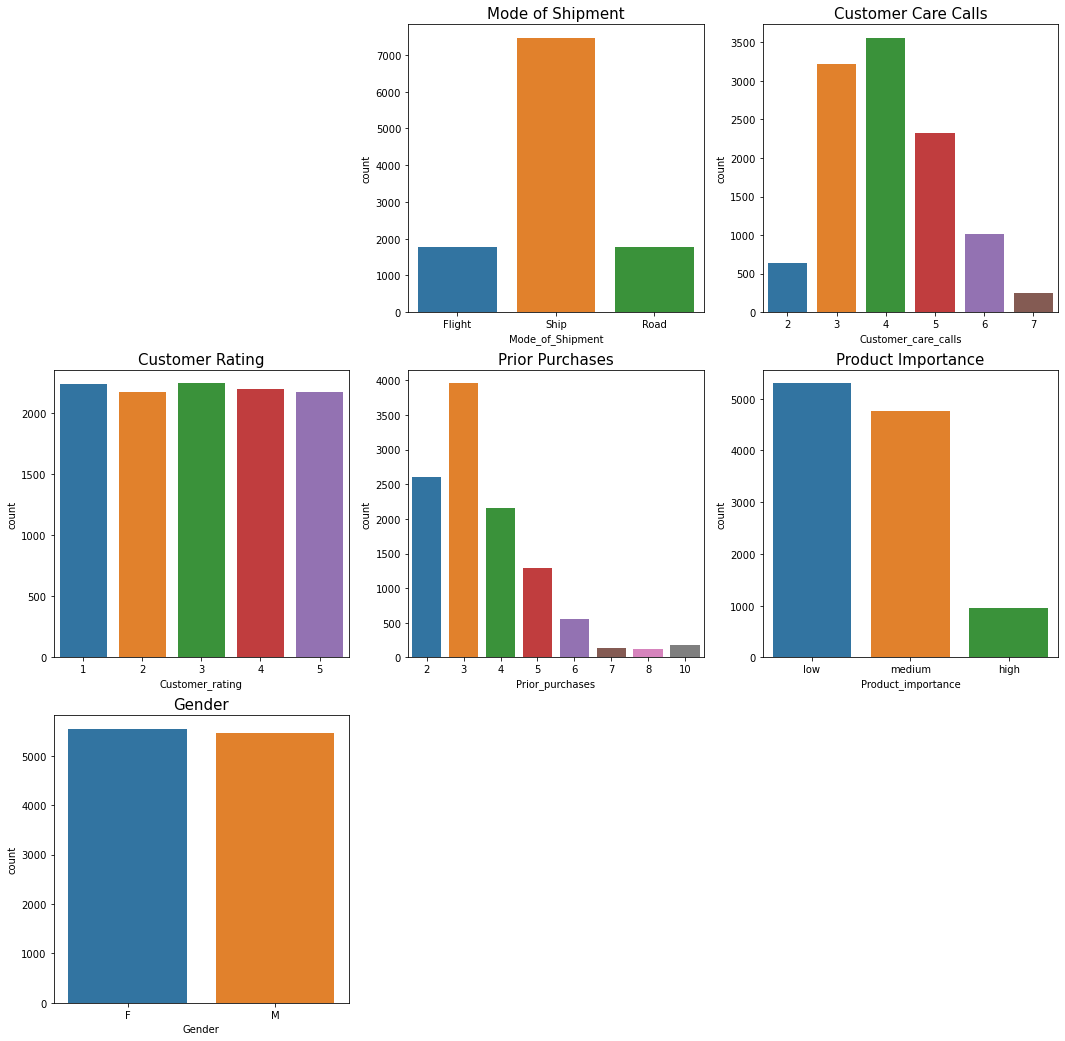

In [10]:
plt.figure(figsize=(18, 18))

plt.subplot(7, 1, 1)
sns.countplot(x='Warehouse_block', data=df)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', data=df)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', data=df)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', data=df)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', data=df)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', data=df)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', data=df)
plt.title('Gender', fontsize=15)

plt.show()

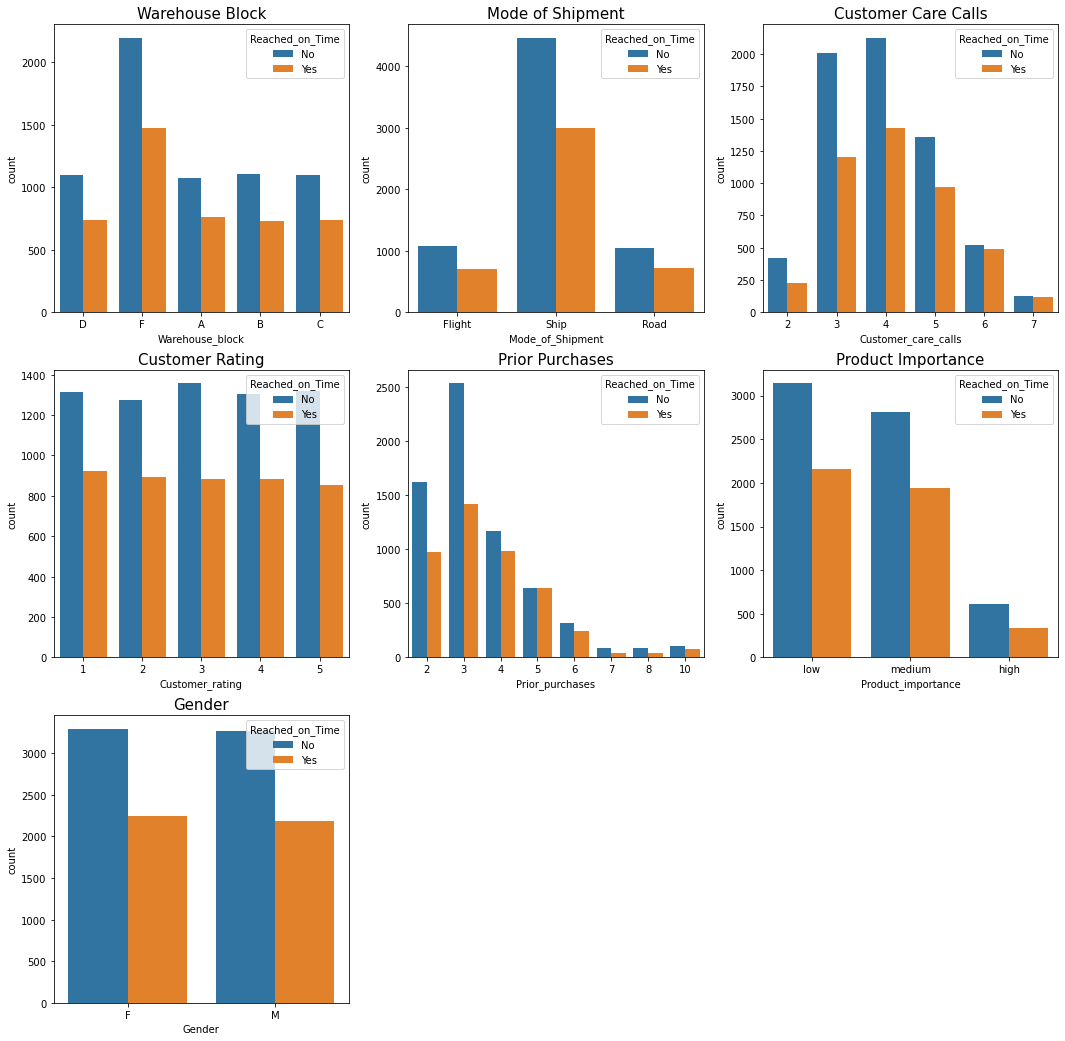

In [11]:
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='Reached_on_Time', data=df)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='Reached_on_Time', data=df)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', hue='Reached_on_Time',  data=df)
plt.title('Customer Care Calls', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', hue='Reached_on_Time',  data=df)
plt.title('Customer Rating', fontsize=15)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', hue='Reached_on_Time',  data=df)
plt.title('Prior Purchases', fontsize=15)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', hue='Reached_on_Time',  data=df)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='Reached_on_Time',  data=df)
plt.title('Gender', fontsize=15)

plt.show()

## Numeric Features

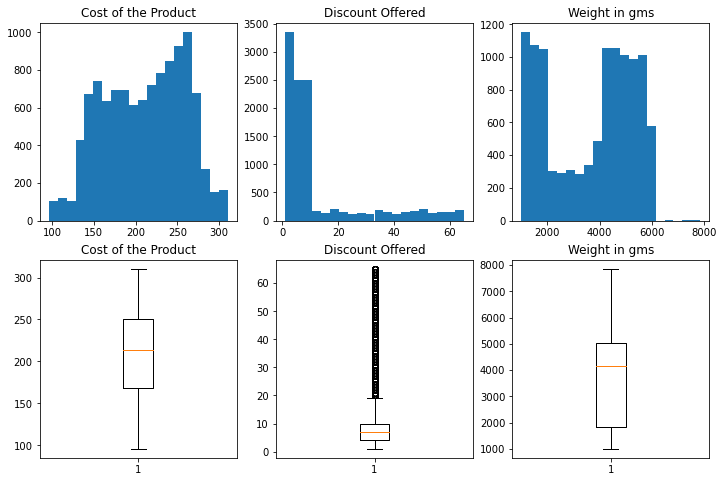

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(df['Cost_of_the_Product'], bins=20)
plt.title('Cost of the Product')

plt.subplot(2, 3, 2)
plt.hist(df['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(2, 3, 3)
plt.hist(df['Weight_in_gms'], bins=20)
plt.title('Weight in gms')

plt.subplot(2, 3, 4)
plt.boxplot(df['Cost_of_the_Product'])
plt.title('Cost of the Product')

plt.subplot(2, 3, 5)
plt.boxplot(df['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(2, 3, 6)
plt.boxplot(df['Weight_in_gms'])
plt.title('Weight in gms')

plt.show()

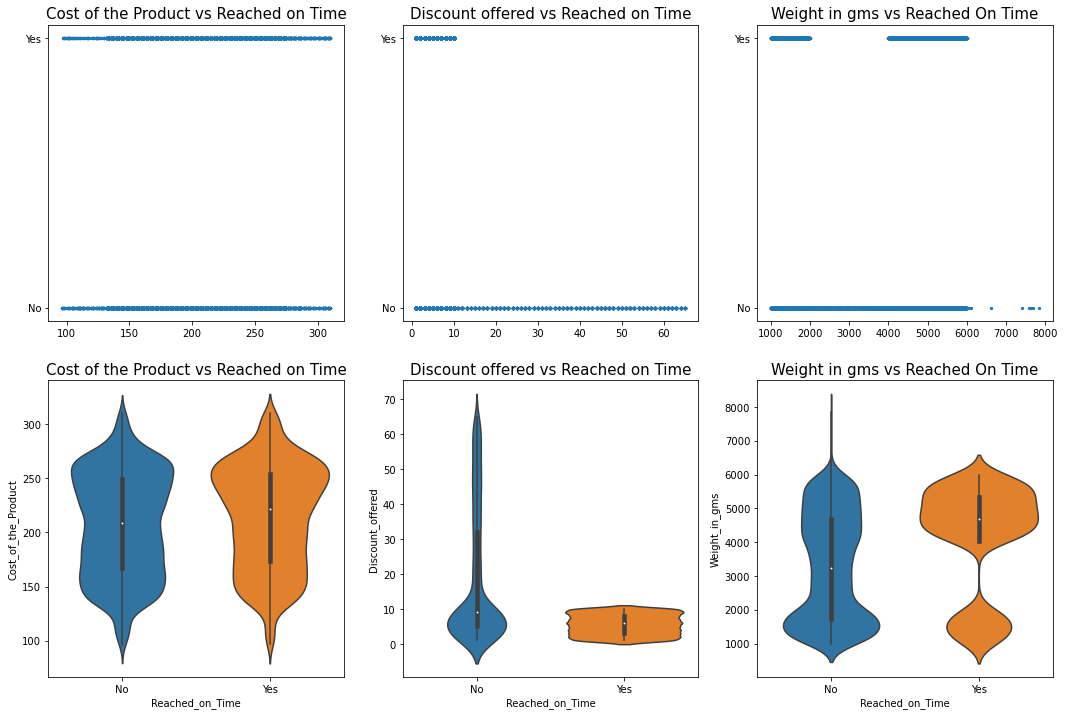

In [13]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(df['Cost_of_the_Product'], df['Reached_on_Time'], s=5)
plt.title("Cost of the Product vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 2)
plt.scatter(df['Discount_offered'], df['Reached_on_Time'], s=5)
plt.title("Discount offered vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 3)
plt.scatter(df['Weight_in_gms'], df['Reached_on_Time'], s=5)
plt.title("Weight in gms vs Reached On Time", fontsize=15)

plt.subplot(2, 3, 4)
sns.violinplot(x='Reached_on_Time', y='Cost_of_the_Product', data=df)
plt.title("Cost of the Product vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 5)
sns.violinplot(x='Reached_on_Time', y='Discount_offered', data=df)
plt.title("Discount offered vs Reached on Time", fontsize=15)

plt.subplot(2, 3, 6)
sns.violinplot(x='Reached_on_Time', y='Weight_in_gms', data=df)
plt.title("Weight in gms vs Reached On Time", fontsize=15)

plt.show()

## Target Column

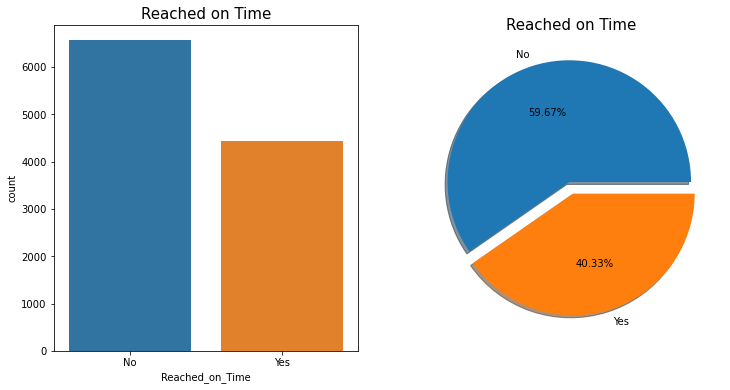

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Reached_on_Time', data=df)
plt.title('Reached on Time', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df['Reached_on_Time'].value_counts(), labels=['No', 'Yes'], explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Reached on Time', fontsize=15)

plt.show()

# Outliers

According to the boxplots created earlier, the only column with outliers seems to be on "**Discount_offered**" column. But there seems to be a lot of outliers in this feature, because of the way boxplot defines outliers. Therefore, instead of directly removing or winsorizing those outliers, I will first apply **Log transformation** and **Square root transformation** to see which works better. Then, I will **winsorize** the remaining outliers.

In [15]:
def sum_outliers(X):
    """Outliers are calculated according to the matplotlib.pyplot's standards."""
    IQR = np.quantile(X, q=0.75) - np.quantile(X, q=0.25)
    upper_whisker = np.quantile(X, q=0.75) + (IQR * 1.5)
    lower_whisker = np.quantile(X, q=0.25) - (IQR * 1.5)
    return (X > upper_whisker).sum() + (X < lower_whisker).sum()

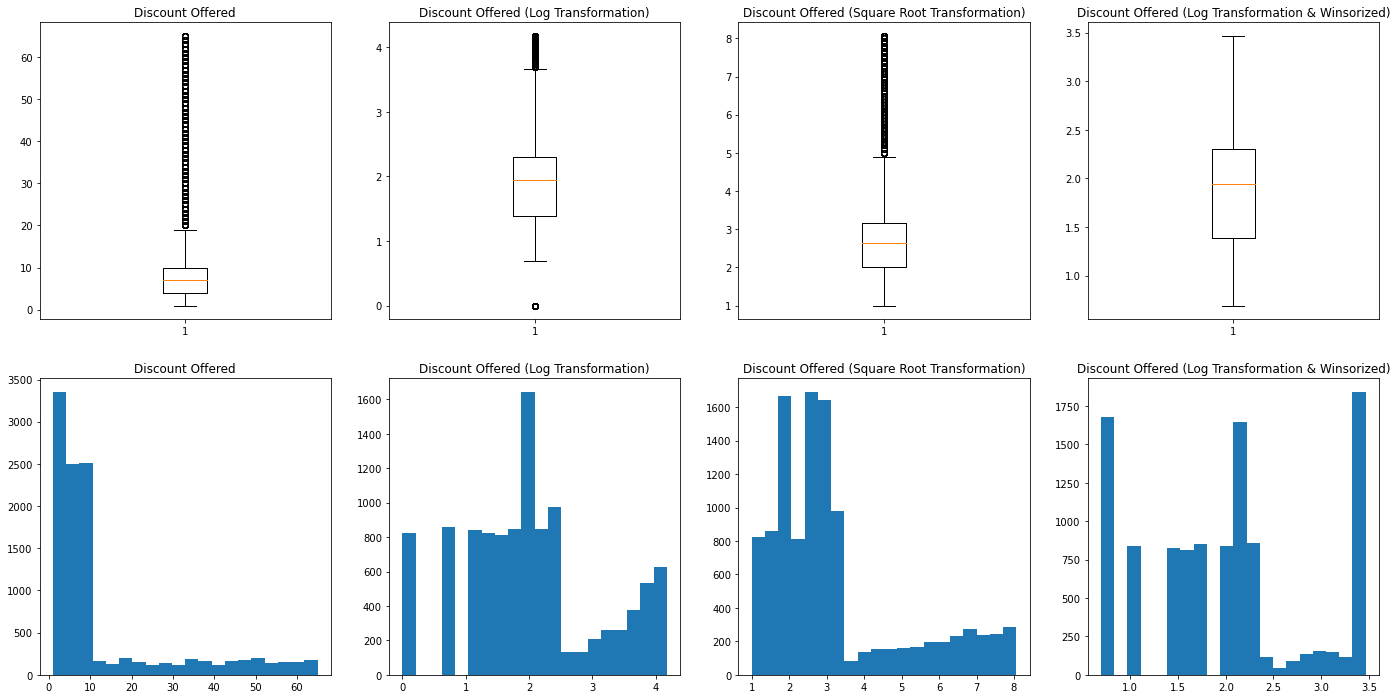

In [16]:
plt.figure(figsize=(24, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(2, 4, 2)
plt.boxplot(np.log(df['Discount_offered']))
plt.title('Discount Offered (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(np.sqrt(df['Discount_offered']))
plt.title('Discount Offered (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)));
plt.title('Discount Offered (Log Transformation & Winsorized)')

plt.subplot(2, 4, 5)
plt.hist(df['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(2, 4, 6)
plt.hist(np.log(df['Discount_offered']), bins=20)
plt.title('Discount Offered (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(np.sqrt(df['Discount_offered']), bins=20)
plt.title('Discount Offered (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)), bins=20);
plt.title('Discount Offered (Log Transformation & Winsorized)')


plt.show()

In [17]:
print("Total number of observations: {}".format(len(df['Discount_offered'])))
print("Number of outliers in 'Discount_offered': {}".format(sum_outliers(df['Discount_offered'])))
print("Number of outliers in 'Discount_offered' (Log Transformation): {}".format(sum_outliers(np.log(df['Discount_offered']))))
print("Number of outliers in 'Discount_offered' (Square Root Transformation): {}".format(sum_outliers(np.sqrt(df['Discount_offered']))))
print("Number of outliers in 'Discount_offered' (Log Transformation & Winsorized): {}".format(sum_outliers(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)))))

Total number of observations: 10999
Number of outliers in 'Discount_offered': 2209
Number of outliers in 'Discount_offered' (Log Transformation): 2104
Number of outliers in 'Discount_offered' (Square Root Transformation): 1955
Number of outliers in 'Discount_offered' (Log Transformation & Winsorized): 0


In [18]:
df['Discount_offered'] = np.array(winsorize(np.log(df['Discount_offered']),limits=(0.15, 0.15)))

# Heatmap

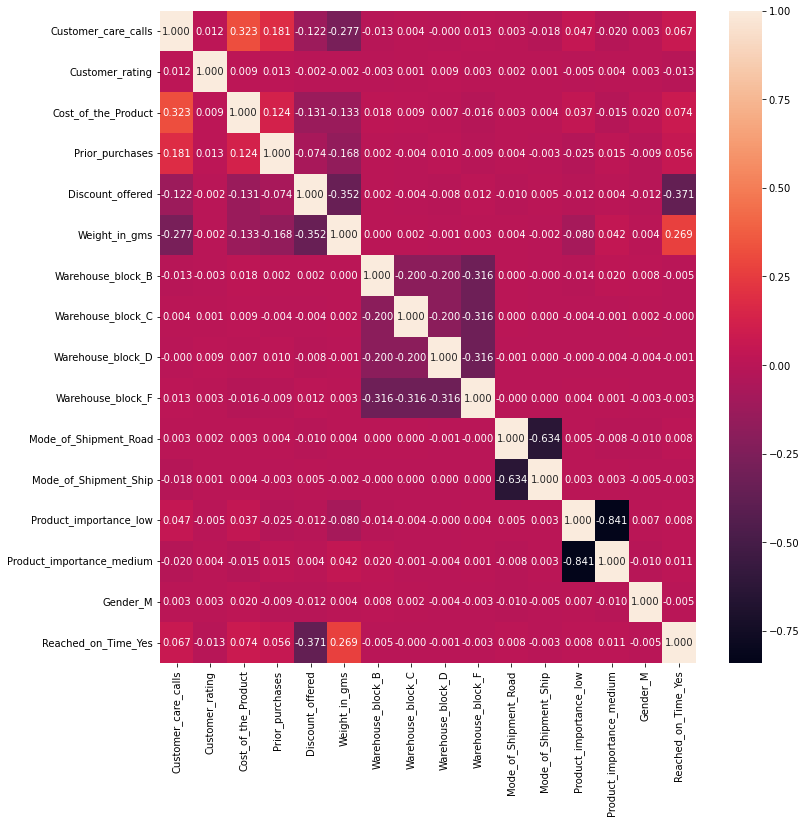

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.get_dummies(df, drop_first=True).corr(), annot=True, fmt='.3f')
plt.show()

In [20]:
pd.get_dummies(df, drop_first=False).corr()['Reached_on_Time_Yes'].sort_values(ascending=False)

Reached_on_Time_Yes          1.000000
Weight_in_gms                0.268793
Cost_of_the_Product          0.073587
Customer_care_calls          0.067126
Prior_purchases              0.055515
Product_importance_medium    0.011099
Warehouse_block_A            0.009317
Mode_of_Shipment_Road        0.007671
Product_importance_low       0.007667
Gender_F                     0.004689
Warehouse_block_C           -0.000132
Warehouse_block_D           -0.000830
Warehouse_block_F           -0.002568
Mode_of_Shipment_Ship       -0.002577
Mode_of_Shipment_Flight     -0.004371
Gender_M                    -0.004689
Warehouse_block_B           -0.005106
Customer_rating             -0.013119
Product_importance_high     -0.033242
Discount_offered            -0.370837
Reached_on_Time_No          -1.000000
Name: Reached_on_Time_Yes, dtype: float64

- **Weight**, and **Cost** are _positively_, amount of **Discount** is _negatively_ correlated with the target variable.
- Overall, there doesn't seem to be the problem of **multicollinearity**.

# One-Hot-Encoding

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
X = df.drop('Reached_on_Time_Yes', axis=1)
y = df['Reached_on_Time_Yes']

# Scaling

## Normalization

In [23]:
normalizer = Normalizer()
X_normalized = pd.DataFrame(normalizer.fit_transform(df.drop('Reached_on_Time_Yes', axis=1)), columns=df.columns[:-1])

## Standardization

In [24]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Reached_on_Time_Yes', axis=1)), columns=df.columns[:-1])

# Building Machine Learning Models

- Logistic Regression
- KNN
- Decision Trees
- Random Forest
- AdaBoost
- Gradient Boosting
- Extra Trees
- Cat Boost
- Support Vector Machines
- XGBoost
- LightGBM

In [25]:
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice, predict for test data, and returns classification metrics."""
    model = Model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

def model_comparison(X, y):
    """Creates a DataFrame comparing Logistic Regression, K-Nearest Neighbors, Decision Tree,
    Random Forest, AdaBoost, Gradient Boosting, Extra Trees, CatBoost, Support Vector Machines,
    XGBoost, and LightGBM."""
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(), X_train, y_train, X_test, y_test)
    knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
    dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)
    rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)
    ada_train_score, ada_test_score, ada_pr, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(), X_train, y_train, X_test, y_test)
    gbc_train_score, gbc_test_score, gbc_pr, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
    xtc_train_score, xtc_test_score, xtc_pr, xtc_re, xtc_f1 = fit_predict_score(ExtraTreesClassifier(), X_train, y_train, X_test, y_test)
    cbc_train_score, cbc_test_score, cbc_pr, cbc_re, cbc_f1 = fit_predict_score(CatBoostClassifier(verbose=0), X_train, y_train, X_test, y_test)
    svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(), X_train, y_train, X_test, y_test)
    xgbc_train_score, xgbc_test_score, xgbc_pr, xgbc_re, xgbc_f1 = fit_predict_score(XGBClassifier(verbosity=0), X_train, y_train, X_test, y_test)
    lgbc_train_score, lgbc_test_score, lgbc_pr, lgbc_re, lgbc_f1 = fit_predict_score(LGBMClassifier(), X_train, y_train, X_test, y_test)
    
    models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'AdaBoost',
              'Gradient Boosting', 'Extra Trees', 'CatBoost', 'Support Vector Machines', 'XGBoost', 'LightGBM']
    train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, ada_train_score,
                   gbc_train_score, xtc_train_score, cbc_train_score, svc_train_score, xgbc_train_score, lgbc_train_score]
    test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, ada_test_score,
                  gbc_test_score, xtc_test_score, cbc_test_score, svc_test_score, xgbc_test_score, lgbc_test_score]
    precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, ada_pr, gbc_pr, xtc_pr, cbc_pr, svc_pr, xgbc_pr, lgbc_pr]
    recall = [lr_re, knn_re, dtc_re, rfc_re, ada_re, gbc_re, xtc_re, cbc_re, svc_re, xgbc_re, lgbc_re]
    f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, ada_f1, gbc_f1, xtc_f1, cbc_f1, svc_f1, xgbc_f1, lgbc_f1]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                             1:'Training Score',
                                                                                                             2: 'Test Score (Accuracy)',
                                                                                                             3: 'Precision',
                                                                                                             4: 'Recall',
                                                                                                             5: 'F1 Score'
                                                                                                            }, axis=1)
    
    return model_comparison

In [26]:
print("Default DataFrame:")
display(model_comparison(X, y))
print('-'*40)
print("\nNormalized DataFrame:")
display(model_comparison(X_normalized, y))
print('-'*40)
print("\nStandardized DataFrame:")
display(model_comparison(X_scaled, y))

Default DataFrame:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.627765               0.63168  0.543151   
1       K-Nearest Neighbors       0.783417              0.644077   0.54987   
2             Decision Tree            1.0               0.64022  0.549435   
3             Random Forest            1.0              0.660882  0.563422   
4                  AdaBoost       0.687882              0.678237  0.571355   
5         Gradient Boosting       0.720722              0.681543  0.564964   
6               Extra Trees            1.0              0.660331  0.567108   
7                  CatBoost       0.845026              0.669972  0.565263   
8   Support Vector Machines       0.658977              0.664738   0.57411   
9                   XGBoost       0.924956              0.665289  0.570042   
10                 LightGBM       0.851133              0.672452  0.569799   

      Recall  F1 Score  
0   0.474412   0.50646  
1   0.587137  0.567893  
2   0.538036  0.543676  
3   0.660443  0.608087  
4    0.76971  0.655863  
5   0.872061  0.685699  
6   0.622407  0.593472  
7   0.742739  0.641961  
8   0.613416  0.593113  
9   0.650069  0.607431  
10   0.72545  0.638272

----------------------------------------

Normalized DataFrame:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.594246              0.601653       0.0   
1       K-Nearest Neighbors       0.772289              0.638292  0.541693   
2             Decision Tree            1.0              0.647934  0.559322   
3             Random Forest            1.0              0.661983  0.564298   
4                  AdaBoost       0.688424               0.66832  0.563152   
5         Gradient Boosting       0.734157              0.669697  0.558559   
6               Extra Trees            1.0              0.666116  0.571603   
7                  CatBoost       0.868232              0.673278  0.569593   
8   Support Vector Machines       0.594246              0.601653       0.0   
9                   XGBoost       0.936626              0.657851  0.561224   
10                 LightGBM       0.879767              0.665014  0.563889   

      Recall  F1 Score  
0        0.0       0.0  
1    0.59751  0.568234  
2   0.547718  0.553459  
3   0.664592  0.610352  
4   0.746196   0.64188  
5   0.814661  0.662729  
6    0.64592  0.606494  
7   0.735823  0.642124  
8        0.0       0.0  
9   0.646611    0.6009  
10  0.701936  0.625385

----------------------------------------

Standardized DataFrame:


Model Training Score Test Score (Accuracy) Precision  \
0       Logistic Regression       0.634822              0.636088  0.548943   
1       K-Nearest Neighbors       0.762654              0.632507  0.535623   
2             Decision Tree            1.0              0.652893  0.564404   
3             Random Forest            1.0              0.661157  0.564671   
4                  AdaBoost       0.687882              0.678237  0.571355   
5         Gradient Boosting       0.720722              0.681543  0.564964   
6               Extra Trees            1.0              0.660055  0.568564   
7                  CatBoost       0.845026              0.669972  0.565263   
8   Support Vector Machines       0.713937              0.655647  0.547758   
9                   XGBoost       0.924956              0.665014  0.569528   
10                 LightGBM       0.852219              0.669421  0.568562   

      Recall  F1 Score  
0   0.484786  0.514873  
1   0.582296  0.557985  
2   0.563624  0.564014  
3   0.652144  0.605263  
4    0.76971  0.655863  
5   0.872061  0.685699  
6   0.607884  0.587567  
7   0.742739  0.641961  
8   0.777317  0.642653  
9   0.651452  0.607742  
10  0.705394   0.62963

As expected, normalizing or standardization the data did not improve the performance of classification models significantly. I will proceed with the unscaled data.

# Hyperparameter Tuning

## Logistic Regression

In [27]:
start = time.time()

params = {"C": [10 ** x for x in range (-5, 5, 1)],
          "penalty": ['l1', 'l2']}

lr_grid = GridSearchCV(estimator=LogisticRegression(),
                       param_grid = params,
                       cv = 5,
                       verbose=3)

lr_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=1e-05, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=1e-05, penalty=l2;, score=0.685 total time=   0.0s
[CV 2/5] END ...............C=1e-05, penalty=l2;, score=0.664 total time=   0.0s
[CV 3/5] END ...............C=1e-05, penalty=l2;, score=0.570 total time=   0.0s
[CV 4/5] END ...............C=1e-05, penalty=l2;, score=0.488 total time=   0.0s
[CV 5/5] END ...............C=1e-05, penalty=l2;, score=0.506 total time=   0.0s
[CV 1/5] END ................C=0.0001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ................C=0.0001, penalty=

In [28]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", lr_grid.best_params_)

GridSearchCV Runtime: 0.09 minutes
Best Parameters :  {'C': 1, 'penalty': 'l2'}


## K-Nearest Neighbors

In [29]:
start = time.time()

params = {
    "n_neighbors": [1, 3, 5, 10, 15, 30, 50],
    "weights": ['uniform', 'distance'],
    "metric": ['minkowski', 'euclidian', 'manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

knn_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.777 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.779 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.609 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.473 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.492 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.777 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.779 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.609 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.473 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.492 to

In [30]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", knn_grid.best_params_)

GridSearchCV Runtime: 0.2 minutes
Best Parameters :  {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}


## Decision Tree

In [31]:
start = time.time()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)],
    'min_samples_split': [i for i in range(1, 10)],
    'min_samples_leaf': [i for i in range(1, 5)]
}

dtc_grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

dtc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.597 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.597 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.596 total time=   0.0s
[CV 4/5] END criterion=gin

In [32]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", dtc_grid.best_params_)

GridSearchCV Runtime: 0.84 minutes
Best Parameters :  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Random Forest

In [ ]:
start = time.time()

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [4, 5, 6, 7, 8, 10, 15],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

rfc_grid.fit(X, y)

end = time.time()

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.602 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.605 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.549 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.404 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=100;, score=0.402 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.600 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.620 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.548 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.406 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=4, n_estimators=200;, score=0.404 total time=   0.5s
[CV 1/5] END crite

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", rfc_grid.best_params_)

## AdaBoost

In [ ]:
start = time.time()

params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.1, 0.3, 0.5, 0.7]
}

ada_grid = GridSearchCV(estimator = AdaBoostClassifier(),
                        param_grid = params,
                        cv = 5,
                        verbose=3)

ada_grid.fit(X, y)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", ada_grid.best_params_)

## Gradient Boosting

In [ ]:
start = time.time()

params = {
    'learning_rate': [0.1, 0.3, 0.5, 0.8, 1],
    'max_depth': [1, 3, 5, 7, 10, 15, 25],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'n_estimators' : [50, 100, 250, 500]
}

gbc_grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                        param_grid = params,
                        cv = 3,
                        verbose=3)

gbc_grid.fit(X, y)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", gbc_grid.best_params_)

## Extra Trees

In [ ]:
start = time.time()

params = {
    'n_estimators' : [50, 75, 100, 125, 150],
    'max_depth': [i for i in range(1, 10, 2)],
    'min_samples_leaf': [i for i in range(1, 10, 2)],
    'min_samples_split': [i for i in range(1, 10, 2)]
}

xtc_grid = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = params,
                        cv = 3,
                        verbose=3)

xtc_grid.fit(X, y)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", xtc_grid.best_params_)

## Cat Boost

In [ ]:
start = time.time()

params = {
    'learning_rate': [0.03, 0.1, 0.5],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

cbc_grid = GridSearchCV(estimator = CatBoostClassifier(verbose=0),
                        param_grid = params,
                        cv = 3,
                        verbose=3)

cbc_grid.fit(X, y)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", cbc_grid.best_params_)

## Support Vector Machines

In [ ]:
start = time.time()

params = {'C': [10**i for i in range(1, 2)] + [round(0.1**i,5) for i in range(5)]}

svc_grid = GridSearchCV(estimator = SVC(),
                        param_grid = params,                        
                        cv = 5,
                        verbose=3)

svc_grid.fit(X, y)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print("Best Parameters : ", svc_grid.best_params_)

## XGBoost

In [ ]:
X_sample = X.sample(n=3000, random_state=42)
y_sample = y[X_sample.index]

start = time.time()

params = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.1, 0.3, 0.5, 0.8, 1],
    'colsample_bytree': [0.1, 0.3, 0.5],
    'n_estimators' : [100, 200, 300, 400, 500],
    'objective': ['reg:squarederror']
}

xgbc_grid = GridSearchCV(estimator = XGBClassifier(),
                         param_grid = params,
                         cv = 3,
                         verbose=3)

xgbc_grid.fit(X_sample, y_sample)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print('Best Parameters: ', xgbc_grid.best_params_)

## LightGBM

In [ ]:
start = time.time()

params = {
    'learning_rate': [10 ** x for x in range (-5, 5, 1)],
    'n_estimators': [x * 100 for x in range(1, 11)]
}

lgbc_grid = GridSearchCV(estimator = LGBMClassifier(),
                        param_grid = params,                        
                        cv = 3,
                        verbose=3)

lgbc_grid.fit(X_normalized, y)

end = time.time()

In [ ]:
print("GridSearchCV Runtime: {} minutes".format(round((end - start) / 60, 2)))
print('Best Parameters: ', lgbc_grid.best_params_)

# Best Parameters & Comparison

In [ ]:
print("Best Parameters (Logistic Regression): ", lr_grid.best_params_)
print("Best Parameters (K-Nearest Neighbors): ", knn_grid.best_params_)
print("Best Parameters (Decision Tree): ", dtc_grid.best_params_)
print("Best Parameters (Random Forest): ", rfc_grid.best_params_)
print("Best Parameters (AdaBoost): ", ada_grid.best_params_)
print("Best Parameters (Gradient Boosting): ", gbc_grid.best_params_)
print("Best Parameters (Extra Trees): ", xtc_grid.best_params_)
print("Best Parameters (CatBoost): ", cbc_grid.best_params_)
print("Best Parameters (SVC): ", svc_grid.best_params_)
print('Best Parameters (XGBoost):', xgbc_grid.best_params_)
print('Best Parameters (LightGBM): ', lgbc_grid.best_params_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr_train_score, lr_test_score, lr_pr, lr_re, lr_f1 = fit_predict_score(LogisticRegression(C=1, penalty='l2'), X_train, y_train, X_test, y_test)
knn_train_score, knn_test_score, knn_pr, knn_re, knn_f1 = fit_predict_score(KNeighborsClassifier(metric='minkowski', n_neighbors=3, weights='uniform'), X_train, y_train, X_test, y_test)
dtc_train_score, dtc_test_score, dtc_pr, dtc_re, dtc_f1 = fit_predict_score(DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1, min_samples_split=2), X_train, y_train, X_test, y_test)
rfc_train_score, rfc_test_score, rfc_pr, rfc_re, rfc_f1 = fit_predict_score(RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=100), X_train, y_train, X_test, y_test)
ada_train_score, ada_test_score, ada_pr, ada_re, ada_f1 = fit_predict_score(AdaBoostClassifier(learning_rate=0.1, n_estimators=10), X_train, y_train, X_test, y_test)
gbc_train_score, gbc_test_score, gbc_pr, gbc_re, gbc_f1 = fit_predict_score(GradientBoostingClassifier(learning_rate=0.8, max_depth=5, n_estimators=500, subsample=0.1), X_train, y_train, X_test, y_test)
xtc_train_score, xtc_test_score, xtc_pr, xtc_re, xtc_f1 = fit_predict_score(ExtraTreesClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=75), X_train, y_train, X_test, y_test)
cbc_train_score, cbc_test_score, cbc_pr, cbc_re, cbc_f1 = fit_predict_score(CatBoostClassifier(verbose=0, depth=6, l2_leaf_reg=3, learning_rate=0.5), X_train, y_train, X_test, y_test)
svc_train_score, svc_test_score, svc_pr, svc_re, svc_f1 = fit_predict_score(SVC(C=10), X_train, y_train, X_test, y_test)
xgbc_train_score, xgbc_test_score, xgbc_pr, xgbc_re, xgbc_f1 = fit_predict_score(XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=1, min_child_weight=7, n_estimators=100, objective='reg:squarederror', subsample=0.5), X_train, y_train, X_test, y_test)
lgbc_train_score, lgbc_test_score, lgbc_pr, lgbc_re, lgbc_f1 = fit_predict_score(LGBMClassifier(learning_rate=10000, n_estimators=100), X_train, y_train, X_test, y_test)

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'AdaBoost',
          'Gradient Boosting', 'Extra Trees', 'CatBoost', 'Support Vector Machines', 'XGBoost', 'LightGBM']
train_score = [lr_train_score, knn_train_score, dtc_train_score, rfc_train_score, ada_train_score,
               gbc_train_score, xtc_train_score, cbc_train_score, svc_train_score, xgbc_train_score, lgbc_train_score]
test_score = [lr_test_score, knn_test_score, dtc_test_score, rfc_test_score, ada_test_score,
              gbc_test_score, xtc_test_score, cbc_test_score, svc_test_score, xgbc_test_score, lgbc_test_score]
precision = [lr_pr, knn_pr, dtc_pr, rfc_pr, ada_pr, gbc_pr, xtc_pr, cbc_pr, svc_pr, xgbc_pr, lgbc_pr]
recall = [lr_re, knn_re, dtc_re, rfc_re, ada_re, gbc_re, xtc_re, cbc_re, svc_re, xgbc_re, lgbc_re]
f1 = [lr_f1, knn_f1, dtc_f1, rfc_f1, ada_f1, gbc_f1, xtc_f1, cbc_f1, svc_f1, xgbc_f1, lgbc_f1]

tuned_models = pd.DataFrame(data=[models, train_score, test_score, precision, recall, f1]).T.rename({0: 'Model',
                                                                                                     1:'Training Score',
                                                                                                     2: 'Test Score (Accuracy)',
                                                                                                     3: 'Precision',
                                                                                                     4: 'Recall',
                                                                                                     5: 'F1 Score'
                                                                                                        }, axis=1)

In [ ]:
print("Default Parameters:")
display(model_comparison(X, y))
print('-'*40)
print("\nTuned Parameters:")
display(tuned_models)

# Classification with Artificial Neural Networks (ANN)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

print("Shape of train set (X) :", X_train.shape)
print("Shape of train set (y) :", y_train.shape)
print("Shape of test set  (X) :", X_test.shape)
print("Shape of test set  (y) :", y_test.shape)

input_shape = X_train.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (input_shape,), name = "Hidden_Layer_1"))
model.add(Dense(8, activation='relu', name = "Hidden_Layer_2"))
model.add(Dense(4, activation='relu', name = "Hidden_Layer_3"))
model.add(Dense(2, activation='relu', name = "Hidden_Layer_4"))
model.add(Dense(1, activation='sigmoid', name = "Output"))

model.summary()

In [ ]:
model.compile(optimizer ='adam',
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose = 0)[1]
test_score = model.evaluate(X_test, y_test, verbose = 0)[1]

print("Training Score: {:.3f}".format(train_score))
print("Test Score (Accuracy): {:.3f}".format(test_score))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred)))